# Setup
Import python libraries


In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset
Create Pandas dataframe and load sleep health dataset from CSV

In [64]:
df = pd.read_csv("../data/sleep_health_clean.csv")

# Preview first 5 rows of data
df.head()

,person_id,gender,age,occupation,sleep_duration,quality_of_sleep,physical_activity_level,stress_level,bmi_category,blood_pressure,heart_rate,daily_steps,sleep_disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


# Dataset Dictionary
Provide details of each measured variable

| Feature          | Description                                 |
|------------------|---------------------------------------------|
| person_id              | The unique identifier of the participant             |
| gender           | The gender of the participant (Male/Female)                  |
| age   | The age of the participant in years           |
| occupation              | The job or profession of the participant  
| sleep_duration | The number of hours the participant sleeps each day                                       |
| quality_of_sleep | The subjective rating (scale of 1-10) of the participant's sleep experience |
| physical_activity_level | The number of minutes the participant spends in daily activity |
| stress_level | The subjective rating (scale of 1-10) of the participant's stress level |
| bmi_category | The BMI level of the participant (Underweight/Normal/Overweight) |
| blood_pressure | The blood pressure measurement of the participant (Systolic over Diastolic)
| heart_rate | The resting heart rate of the participant in beats/minute |
| daily_steps | The number of steps the participant takes daily |
| sleep_disorder | The sleep disorder of the participant if present (Nullable) |

# Data Types
View columns types and null values


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   person_id                374 non-null    int64  
 1   gender                   374 non-null    object 
 2   age                      374 non-null    int64  
 3   occupation               374 non-null    object 
 4   sleep_duration           374 non-null    float64
 5   quality_of_sleep         374 non-null    int64  
 6   physical_activity_level  374 non-null    int64  
 7   stress_level             374 non-null    int64  
 8   bmi_category             374 non-null    object 
 9   blood_pressure           374 non-null    object 
 10  heart_rate               374 non-null    int64  
 11  daily_steps              374 non-null    int64  
 12  sleep_disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


# Analysis Questions

- Are higher levels of stress associated with lower duration of sleep?
- Does an individual's physical activity level correlate with their quality of sleep?
- Are there certain occupations that are linked to the presence of sleep disorders?
- How does age affect the duration and quality of sleep?

# Exploration: Stress vs Sleep Duration

Visualization: The relationship between stress level and sleep duration.

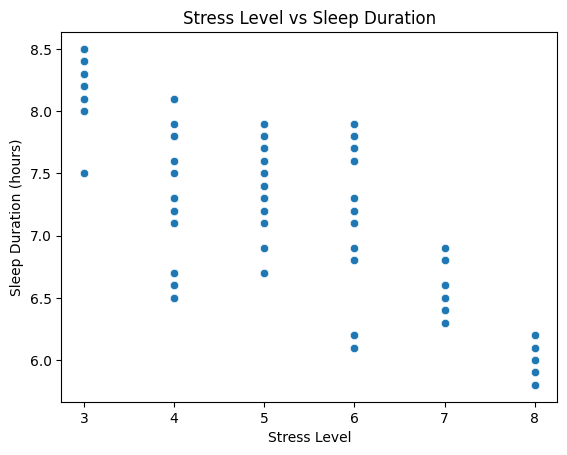

In [66]:
sns.scatterplot(data=df, x="stress_level", y="sleep_duration")
plt.title("Stress Level vs Sleep Duration")
plt.xlabel("Stress Level")
plt.ylabel("Sleep Duration (hours)")
plt.show()

Analysis: Check for outliers with a box and whisker plot

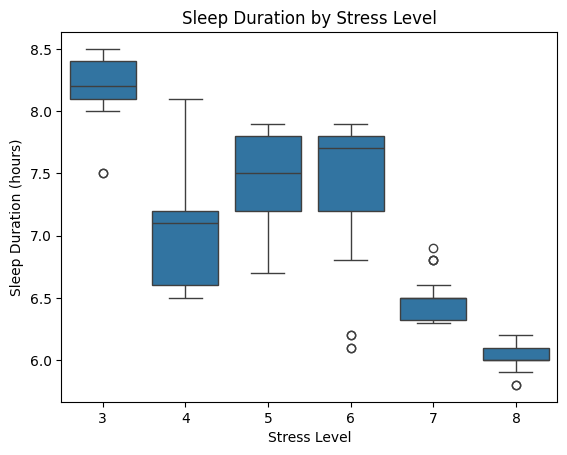

In [67]:
sns.boxplot(data=df, x="stress_level", y="sleep_duration")
plt.title("Sleep Duration by Stress Level")
plt.xlabel("Stress Level")
plt.ylabel("Sleep Duration (hours)")
plt.show()

### Findings:
- There appears to be a negative correlation between stress level and sleep duration.
- As a user's stress level increases, their duration of sleep tends to decrease.
- There are a few statistical outliers which fall outside of the whiskers of the box plot.
    - Generally, there are no unusually high or low sleep durations recorded

# Exploration: Age vs Sleep Duration/Quality

Visualization: The relationship between age and sleep duration

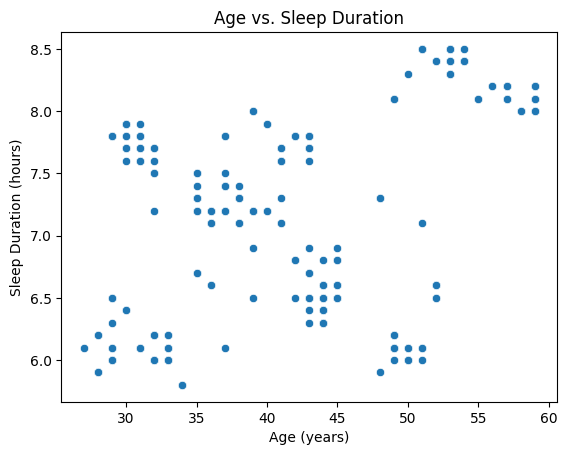

In [68]:
sns.scatterplot(data=df, x="age", y="sleep_duration")
plt.xlabel("Age (years)")
plt.ylabel("Sleep Duration (hours)")
plt.title("Age vs. Sleep Duration")
plt.show()

Visualization: The impact of age on sleep quality

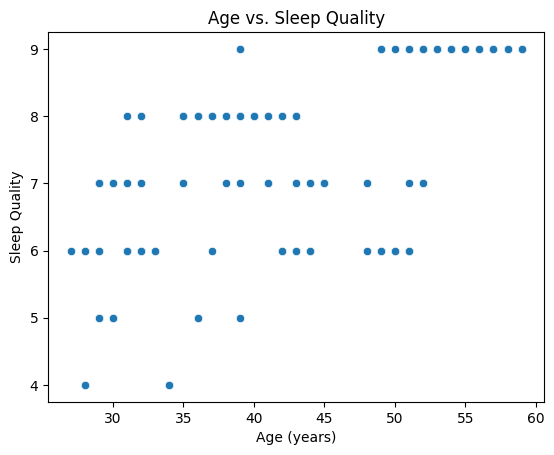

In [69]:
sns.scatterplot(data=df, x="age", y="quality_of_sleep")
plt.xlabel("Age (years)")
plt.ylabel("Sleep Quality")
plt.title("Age vs. Sleep Quality")
plt.show()

### Findings:
- There appears to be no relevant correlation between age and sleep duration.
    - As age increases, there is variation in the amount of sleep duration.
- While not perfect, there is a slight positive correlation between age and sleep quality.
    - Participants from ages 55-60 in particular had the highest sleep quality.


# Basic Stats
Summarize quick statistics for numerical and categorical data

In [70]:
df.describe(include="all")

,person_id,gender,age,occupation,sleep_duration,quality_of_sleep,physical_activity_level,stress_level,bmi_category,blood_pressure,heart_rate,daily_steps,sleep_disorder
count,374.000000,374,374.000000,374,374.000000,374.000000,374.000000,374.000000,374,374,374.000000,374.000000,155
unique,NaN,2,NaN,11,NaN,NaN,NaN,NaN,4,25,NaN,NaN,2
top,NaN,Male,NaN,Nurse,NaN,NaN,NaN,NaN,Normal,130/85,NaN,NaN,Sleep Apnea
freq,NaN,189,NaN,73,NaN,NaN,NaN,NaN,195,99,NaN,NaN,78
mean,187.500000,NaN,42.184492,NaN,7.132086,7.312834,59.171123,5.385027,NaN,NaN,70.165775,6816.844920,NaN
std,108.108742,NaN,8.673133,NaN,0.795657,1.196956,20.830804,1.774526,NaN,NaN,4.135676,1617.915679,NaN
min,1.000000,NaN,27.000000,NaN,5.800000,4.000000,30.000000,3.000000,NaN,NaN,65.000000,3000.000000,NaN
25%,94.250000,NaN,35.250000,NaN,6.400000,6.000000,45.000000,4.000000,NaN,NaN,68.000000,5600.000000,NaN
50%,187.500000,NaN,43.000000,NaN,7.200000,7.000000,60.000000,5.000000,NaN,NaN,70.000000,7000.000000,NaN
75%,280.750000,NaN,50.000000,NaN,7.800000,8.000000,75.000000,7.000000,NaN,NaN,72.000000,8000.000000,NaN


# Missing Values?
Only nullable column is 'Sleep Disorder' if user has no disorders


In [71]:
df.isnull().sum()

person_id                    0
gender                       0
age                          0
occupation                   0
sleep_duration               0
quality_of_sleep             0
physical_activity_level      0
stress_level                 0
bmi_category                 0
blood_pressure               0
heart_rate                   0
daily_steps                  0
sleep_disorder             219
dtype: int64